In [6]:
print("Lecture-26")

Lecture-26


## IMDB Örneği - RNN

In [1]:
from tensorflow.keras.datasets import imdb

VOCAB_SIZE = 10000
TEXT_SIZE = 300

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = imdb.load_data(num_words=VOCAB_SIZE)



In [2]:
training_dataset_x

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

training_dataset_x = pad_sequences(training_dataset_x, maxlen=TEXT_SIZE)
test_dataset_x = pad_sequences(test_dataset_x, maxlen=TEXT_SIZE)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential(name = 'RNN')
model.add(Embedding(VOCAB_SIZE, 64, input_length = TEXT_SIZE, name='Embedding'))
model.add(SimpleRNN(32, activation='relu', return_sequences= True ,name='SimpleRNN-1'))
model.add(SimpleRNN(32, activation='relu', name='SimpleRNN-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))

model.summary()

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 300, 64)           640000    
                                                                 
 SimpleRNN-1 (SimpleRNN)     (None, 300, 32)           3104      
                                                                 
 SimpleRNN-2 (SimpleRNN)     (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 645,217
Trainable params: 645,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

esc = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True, verbose = 1)
hist = model.fit(training_dataset_x, training_dataset_y, epochs=20, batch_size=32, validation_split=0.2, callbacks=[esc])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 80ms/step - binary_accuracy: 0.6175 - loss: 0.6291 - val_binary_accuracy: 0.8010 - val_loss: 0.4176
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - binary_accuracy: 0.8643 - loss: 0.3372 - val_binary_accuracy: 0.8820 - val_loss: 0.2940
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - binary_accuracy: 0.8978 - loss: 0.2778 - val_binary_accuracy: 0.8854 - val_loss: 0.2870
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - binary_accuracy: 0.9142 - loss: 0.2372 - val_binary_accuracy: 0.8806 - val_loss: 0.2874
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - binary_accuracy: 0.9281 - loss: 0.2033 - val_binary_accuracy: 0.8964 - val_loss: 0.2988
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - binary_accuracy: 0.9381 - loss: 0.1808 - val_binary_accuracy: 0.8936 - val_loss: 0.3025
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - binary_accuracy: 0.9486 - loss: 0.1516 - val_binary_accuracy: 0.8856 - val_loss:

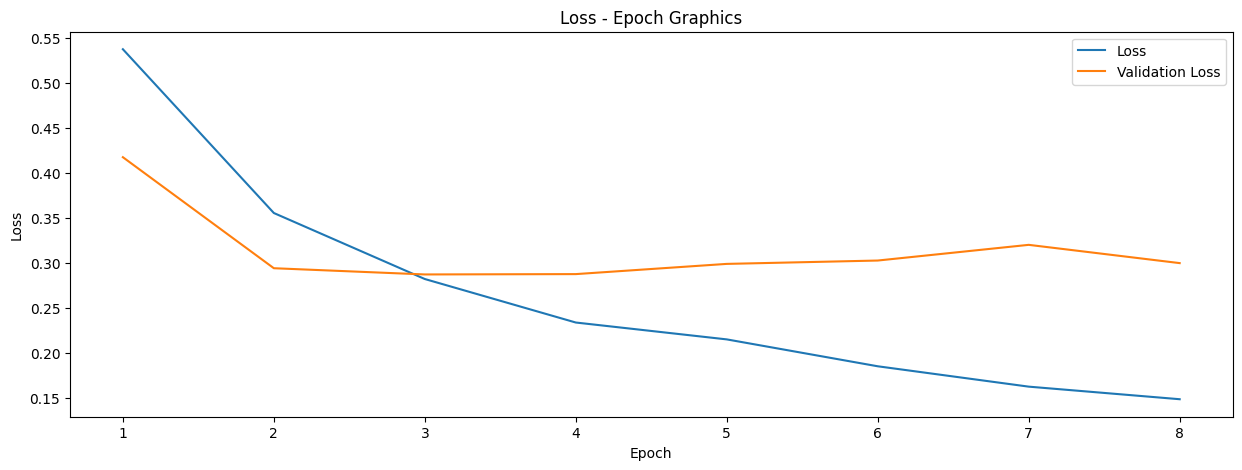

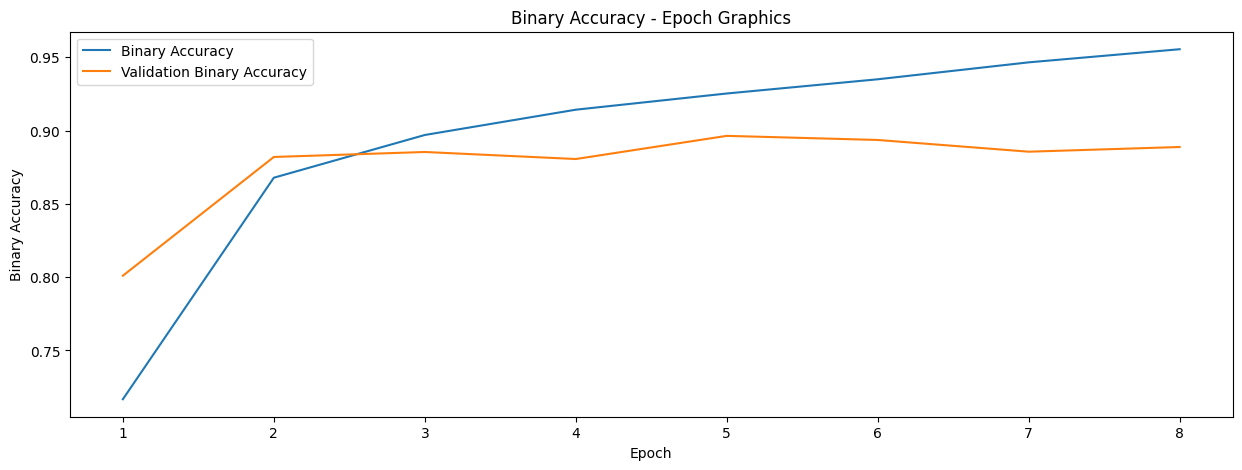

In [ ]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()


figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Binary Accuracy - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')
plt.plot(range(1, len(hist.history['binary_accuracy']) + 1), hist.history['binary_accuracy'])
plt.plot(range(1, len(hist.history['val_binary_accuracy']) + 1), hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()

In [ ]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
  print(f'{model.metrics_names[i]} --> {eval_result[i]}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - binary_accuracy: 0.8775 - loss: 0.2912
loss --> 0.2881382703781128
compile_metrics --> 0.8806800246238708


## Sinir Ağlarında Düzenleme (Regularization) İşlemleri

overfitting'in başlıca sebepleri

- Modelin karmaşık olması yani çok fazla nöron içermesi
- eğitim verilerinin az olması
- eğitim sırasında fazla epoch uygulanması

Makine öğrejnnmesinde overfitting durumunu engellemek için kullanılan yöntemlere düzenleme (Regularization) işlemleri denilmektedir. En çok kullanılan düzenleme işlemlerinden iki tanesi "L1 / L2" düzenlemesi ve "dropout" düzenlemesidir.

### Dropout Düzenlemesi (Dropout Regularization)

Bu tekniğe göre sinir ağının saklı katmanlarındaki nöronların belli kısımları eğitim sırasında rastgele bir biçimde ağdan atılırsa bu durum overfitting durumuna direnç oluşturmaktadır. Dropout işlemi özellikle ağın saklı katmanları üzerinde uygulanmaktadır.

Aslında dropout işlemi sırasında uygulamada atılacak nöronlar gerçekten ağdan atılmamakta yalnıca onların çıktı değerleri bir sonraki katman için 0'a çekilmektedir. Dropout işlemi sırasında ağdan atılacak nöronlar nasıl belirlenmektedir? Bu işlem belli bir olasılık dahilinde rastgele bir biçimde yapılmaktadır. Örneğin nöron atılma olasılığı için 0.5 değerinin kullanıldığını düşünelim. Bu durumda katmandaki nöronun atılma olasılığı 0.5'tir. (Yani örneğin bu durumda 0 ile 1 arasında rastgele bir sayı üretilir. Eğerbu sayı 0.5'ten düşükse nöron atılır, değilse nöron atılmaz. Benzer biçimde örneğin nöron atılma olasılığı 0.2 ise katmandaki her nöron için yine 0 ile 1 arasında rastgele bir sayı üretilir. Bu saytı 0.2'den küçükse nöron atılır, değilse nöron atılmaz. Uygulamada saklı katmanlar için genellikle 0.2 ile 0.5 arasında değerler girdi katmanı için ise 0.8 civarında değerler kullanılmaktadır.

Dropout işlemi eğitim sırasında her batch işleminden sonbra uygulanmaktadır. Yani her batch işlemi bittiğinde nöron ağırlık değerleri güncellendikten sonbra yeniden ilgili katmanda belirlenen oranda nöron ağdan atılmaktadır. Böylece her batch işlemi sırasında ağdan farklı nöron grubu atılmaktadır. Geri besleme ağlarda bir nöronun ağdan atılması (yani çıktısının 0 'A çekilmesi) yapılan geri beslemenin de iptal edilmesi gibi bir anlama gelmektedir.

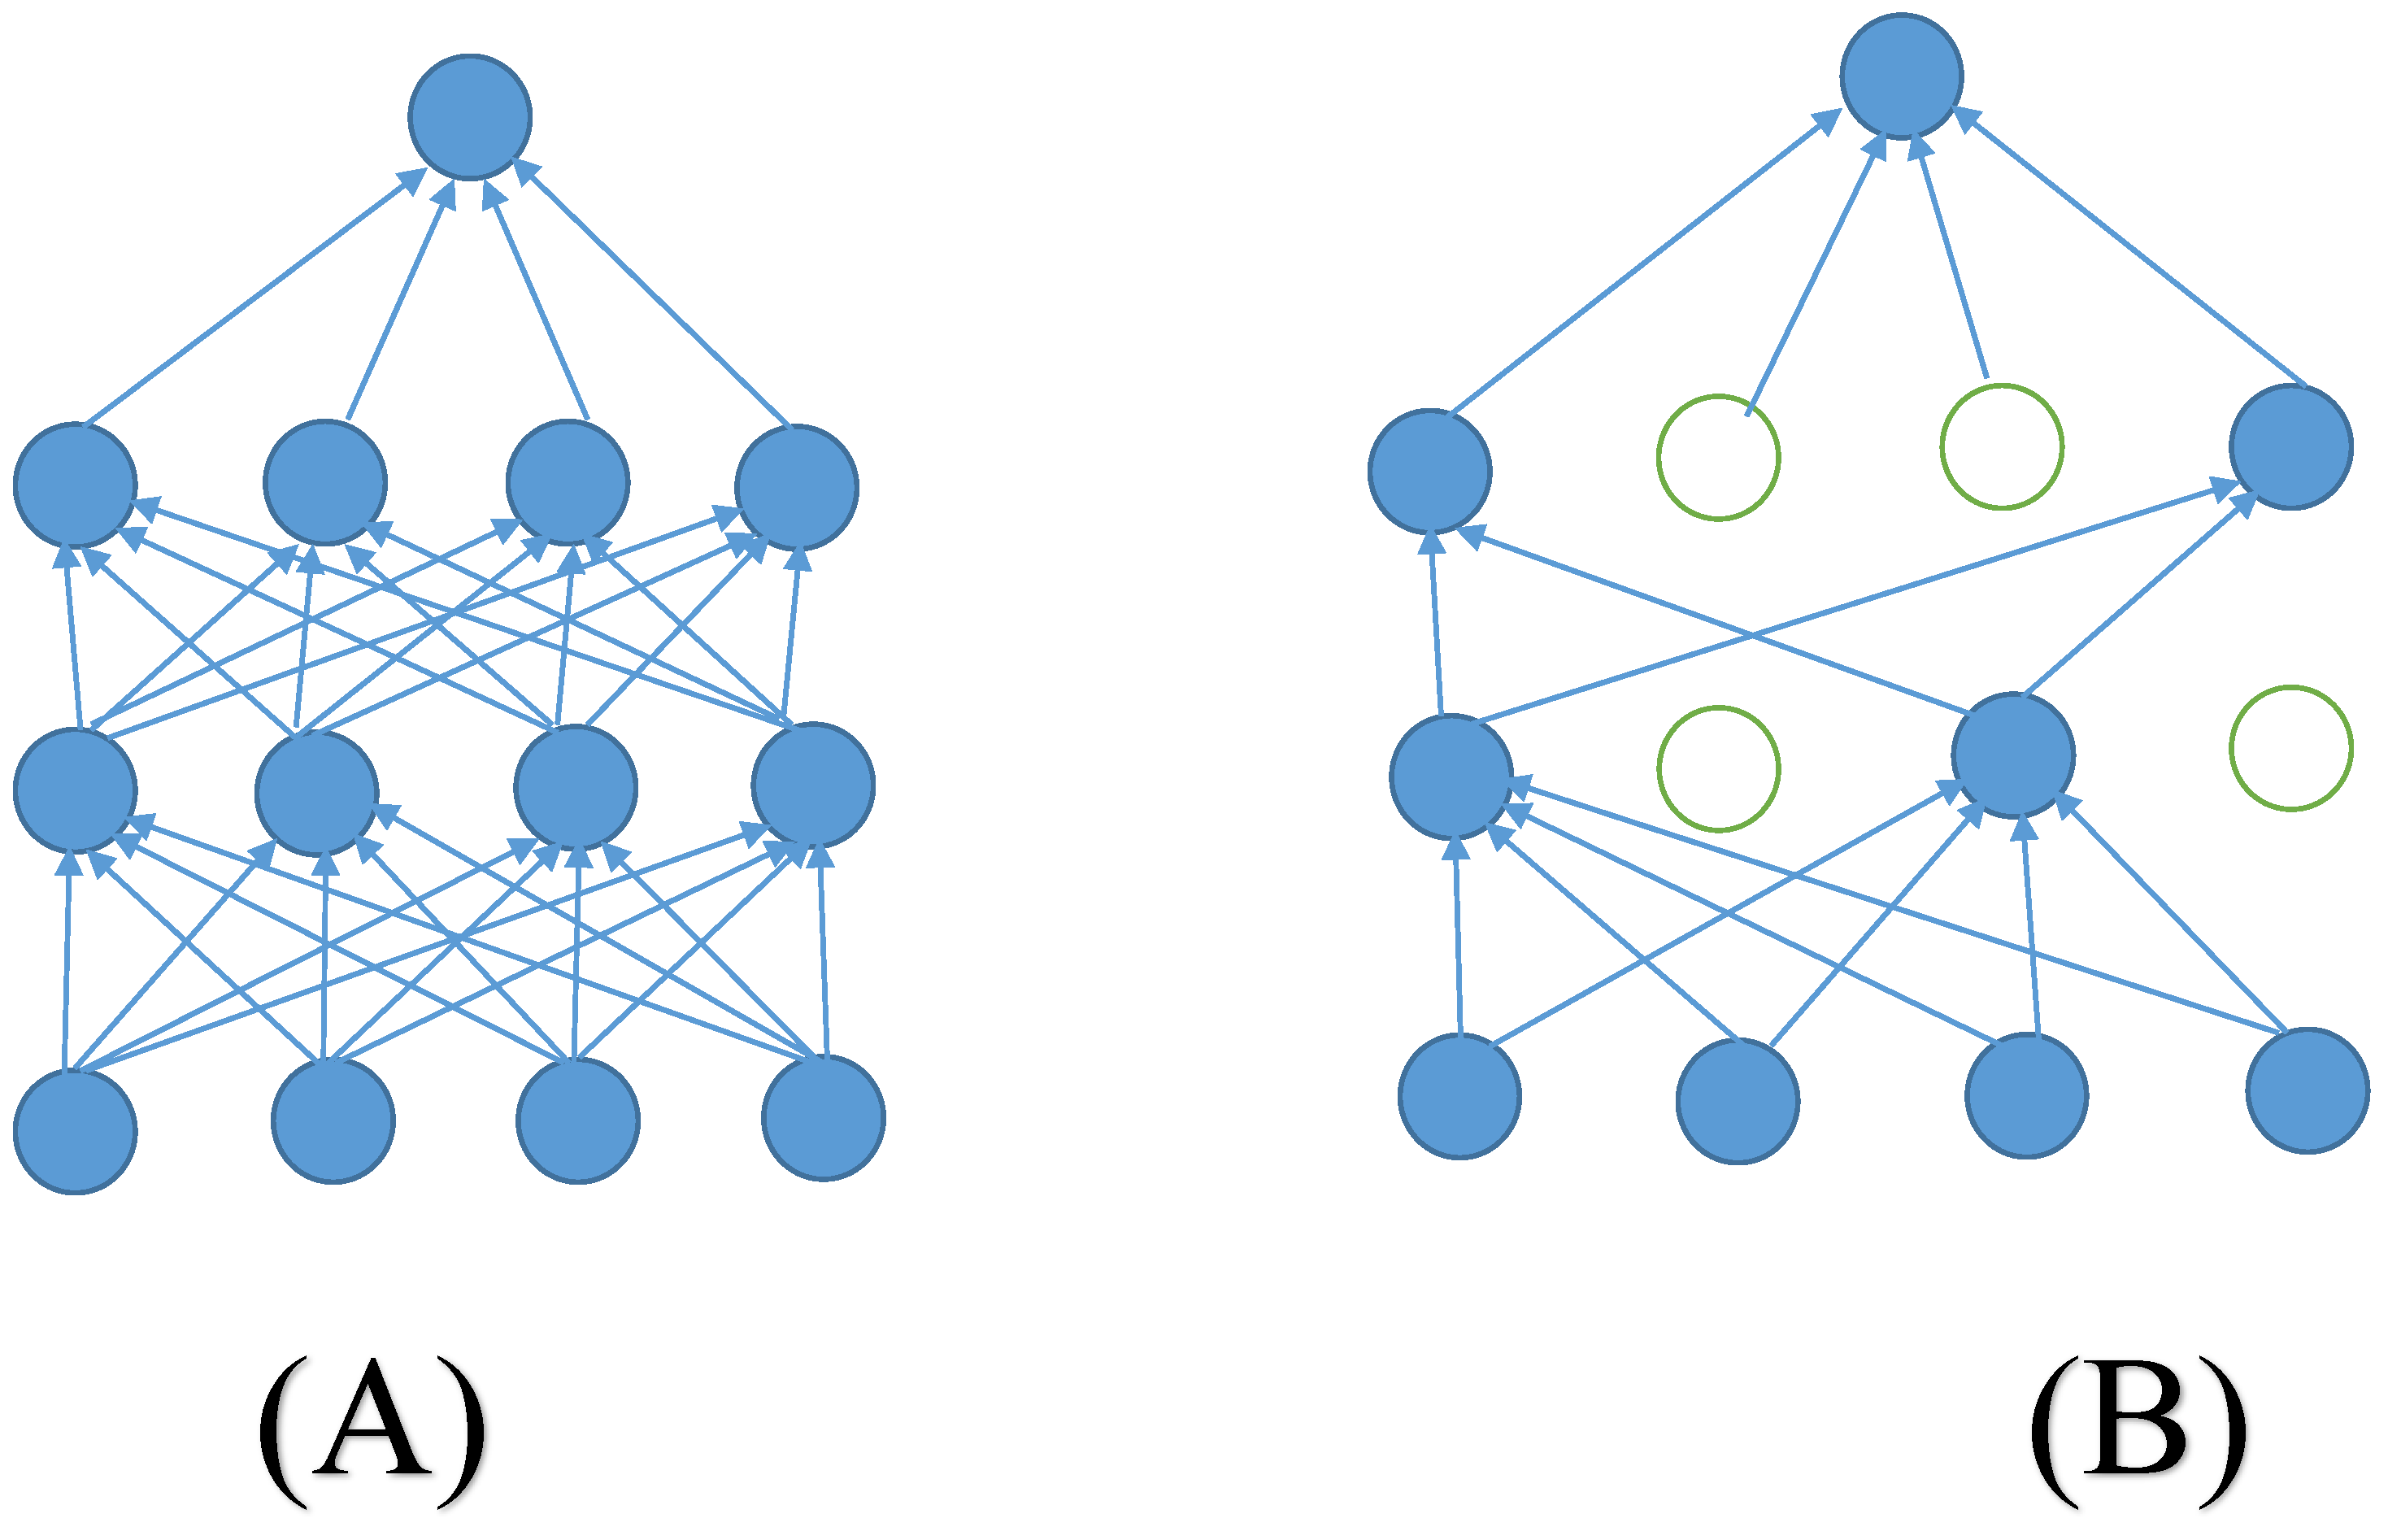

Ağ eğitildikten sonra dropout işlemi yapılmaz.

tensorflow.keras.layers.Dropout(
 rate,
 noise_shape=None,
 seed=None,
 **kwargs
)

Dropout katmanı atılmayan nöronların çıktı değerlerini 1  / (1- rate) oranında yükseltiyor.


In [ ]:
import numpy as np
import tensorflow as tf

layer = tf.keras.layers.Dropout(0.5)
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype = np.float32)
result = layer(data, training = True)
print(data)
print(result)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
tf.Tensor([ 2.  4.  6.  0. 10.  0.  0.  0.  0.  0.], shape=(10,), dtype=float32)


### Geri Beslemeli Ağlar için LSTM Katmanı

SimpleRNN katmanı aslıında uygulamalarda pek tercih edilmemektedir. Çünkü bu katmanın bazı sorunları mevcuttur. SimpleRNN Katmanı her ne kadar geçmişe doğru bir hafıza oluşturuyorsa da bu hafıza "vanishing gradient problem" ismi verilen bir sorun yüzünden yakın geçmişe yönelik olarak kalmaktadır. Yani simpleRNN katmanı o andaki bağlamın hemen öncesini yine bir biçimde hatırlayabilmekte geçmişi gittikçe daha zor hatırlayabilmektedir. Bu durum bağlamsal etkiyi azaltmaktadır. 90'lı yılların sonlarına doğru LSTM ve GRU katmanları bu sorunu çözmek için kullanılmaya başlanmıştır.

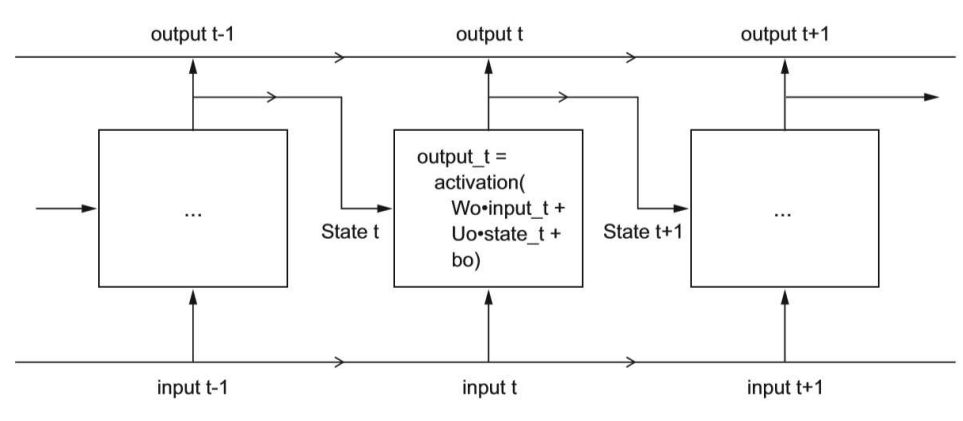

LSTM (Long short term memory) katmanı ağa hem kısa süreli hem de uzun süreli bir hafıza oluşturmayı hedeflemektedir. LSTM SimpleRNN'nin mimari olarak biraz daha geliştirilmiş bir biçimidir. LSTM katmanında uzun dönem hafıza etkisi için yeni bir giriş daha ağa eklenmiş durumdadır.

output_t = activation(np.dot(input_t, W) + np.dot(state_t, U) + np.dot(c_t, V) + b)

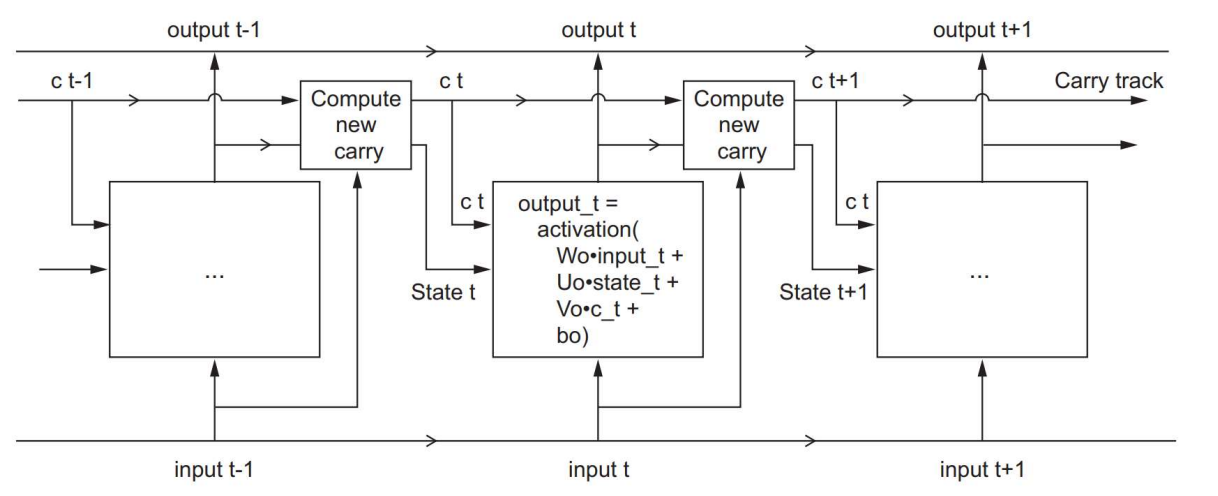

i_t = activation(np.dot(state_t, Ui) + np.dot(input_t, Wi) + bi)
f_t = activation(np.dot(state_t, Uf) + np.dot(input_t, Wf) + bf)
k_t = activation(np.dot(state_t, Uk) + np.dot(input_t, Wk) + bk)


tensorflow.keras.layers.LSTM(
 units,
 activation='tanh',
 recurrent_activation='sigmoid',
 use_bias=True,
 kernel_initializer='glorot_uniform',
 recurrent_initializer='orthogonal',
 bias_initializer='zeros',
 unit_forget_bias=True,
 kernel_regularizer=None,
 recurrent_regularizer=None,
 bias_regularizer=None,
 activity_regularizer=None,
 kernel_constraint=None,
 recurrent_constraint=None,
 bias_constraint=None,
 dropout=0.0,
 recurrent_dropout=0.0,
 implementation=2,
 return_sequences=False,
 return_state=False,
 go_backwards=False,
 stateful=False,
 unroll=False
)

LSTM SimpleRNN'e göre tercih edilmeli mi? Aslında LSTM uzun dönem hafıza etkisini sağladığına göre bunun bazı modellerde dezavantajı da olabilmektedir. Fakat genellikle bu uzun dönem etki istenir. Bu nedenle LSTM katmanı çoğu kez SimpleRNN'e tercih edilmektedir.


In [5]:
from tensorflow.keras.datasets import imdb

VOCAB_SIZE = 30000
TEXT_SIZE = 300

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = imdb.load_data(num_words=VOCAB_SIZE)

word_dict = imdb.get_word_index()

from tensorflow.keras.preprocessing.sequence import pad_sequences

training_dataset_x = pad_sequences(training_dataset_x, TEXT_SIZE, padding = 'post')
test_dataset_x = pad_sequences(test_dataset_x, TEXT_SIZE, padding = 'post')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout

model = Sequential(name = 'IMDB-LSTM')
model.add(Embedding(VOCAB_SIZE, 64, input_length = TEXT_SIZE, name='Embedding'))
model.add(LSTM(64, activation = 'tanh', name = 'LSTM'))
model.add(Dropout(0.5, name = 'Dropout-1'))
model.add(Dense(128, activation='relu', name = 'Dense'))
model.add(Dropout(0.5, name = 'Dropout-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))

model.summary()

1641221/1641221 [==============================] - 1s 1us/step
Model: "IMDB-LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 300, 64)           1920000   
                                                                 
 LSTM (LSTM)                 (None, 64)                33024     
                                                                 
 Dropout-1 (Dropout)         (None, 64)                0         
                                                                 
 Dense (Dense)               (None, 128)               8320      
                                                                 
 Dropout-2 (Dropout)         (None, 128)               0         
                                                                 
 Output (Dense)              (None, 1)                 129       
                                                            

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

esc = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True, verbose = 1)
hist = model.fit(training_dataset_x, training_dataset_y, epochs=20, batch_size=32, validation_split=0.2, callbacks=[esc])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - binary_accuracy: 0.5037 - loss: 0.6936 - val_binary_accuracy: 0.5190 - val_loss: 0.6916
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.5313 - loss: 0.6866 - val_binary_accuracy: 0.5576 - val_loss: 0.6585
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.5833 - loss: 0.6468 - val_binary_accuracy: 0.5340 - val_loss: 0.7656
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.5873 - loss: 0.6185 - val_binary_accuracy: 0.7696 - val_loss: 0.5589
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.7938 - loss: 0.4892 - val_binary_accuracy: 0.8238 - val_loss: 0.5509
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.8374 - loss: 0.4437 - val_binary_accuracy: 0.8312 - val_loss: 0.4462
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.8521 - loss: 0.4007 - val_binary_accuracy: 0.8424 - val_loss: 0.500

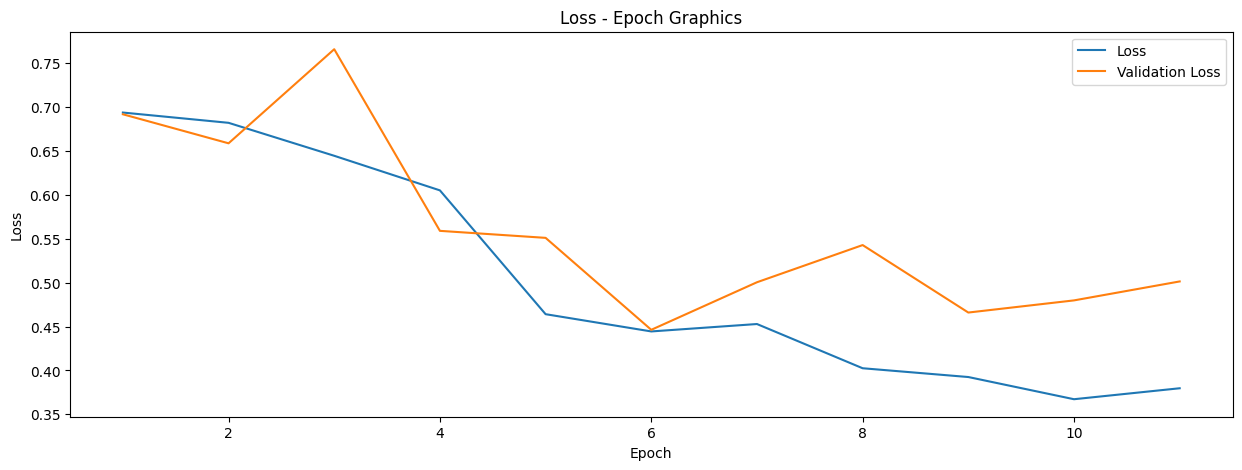

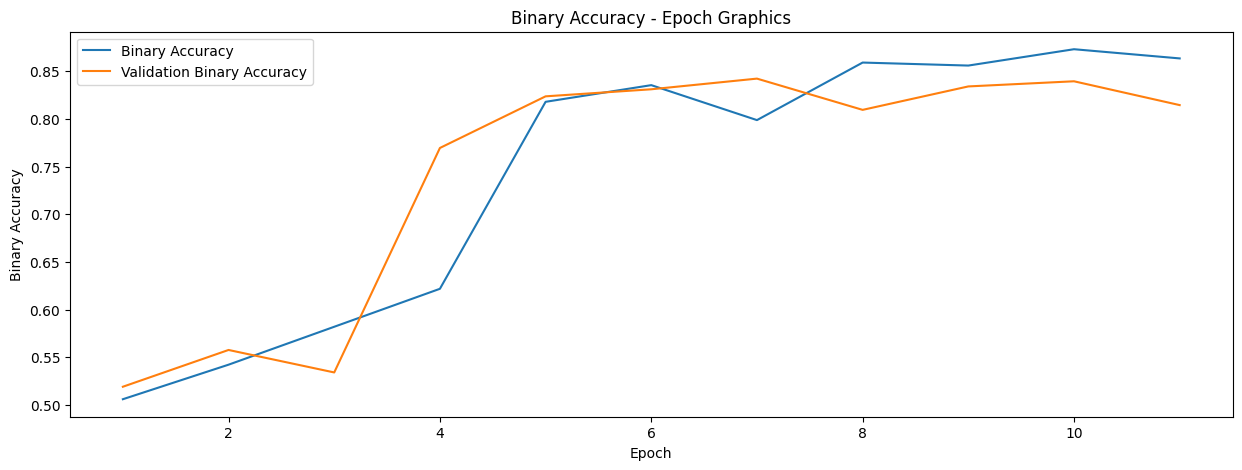

In [ ]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()


figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Binary Accuracy - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')
plt.plot(range(1, len(hist.history['binary_accuracy']) + 1), hist.history['binary_accuracy'])
plt.plot(range(1, len(hist.history['val_binary_accuracy']) + 1), hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()

In [ ]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
 print(f'{model.metrics_names[i]} --> {eval_result[i]}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - binary_accuracy: 0.8265 - loss: 0.4508
loss --> 0.4481460452079773
compile_metrics --> 0.8274800181388855


### Çift Yönlü LSTM Katmanı